# Slow Stochastic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


In [3]:
n = 14 # number of days
s = 3 # smoothing
df['High_Highest'] = df['Adj Close'].rolling(n).max()
df['Low_Lowest'] = df['Adj Close'].rolling(n).min()
df['Fast_%K'] = ((df['Adj Close'] - df['Low_Lowest']) / (df['High_Highest'] - df['Low_Lowest'])) * 100
df['Slow_%K'] = df['Fast_%K'].rolling(s).mean()
df['Slow_%D'] = df['Slow_%K'].rolling(s).mean()

In [4]:
df.head(30)

,Open,High,Low,Close,Adj Close,Volume,High_Highest,Low_Lowest,Fast_%K,Slow_%K,Slow_%D
Date,,,,,,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,NaN,NaN,NaN,NaN,NaN
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,NaN,NaN,NaN,NaN,NaN
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,NaN,NaN,NaN,NaN,NaN
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,NaN,NaN,NaN,NaN,NaN
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,NaN,NaN,NaN,NaN,NaN
2018-08-08,206.050003,207.809998,204.520004,207.250000,204.928696,22525500,NaN,NaN,NaN,NaN,NaN
2018-08-09,207.279999,209.779999,207.199997,208.880005,206.540436,23469200,NaN,NaN,NaN,NaN,NaN
2018-08-10,207.360001,209.100006,206.669998,207.529999,205.925232,24611200,NaN,NaN,NaN,NaN,NaN
2018-08-13,207.699997,210.949997,207.699997,208.869995,207.254883,25869100,NaN,NaN,NaN,NaN,NaN


Text(0.5,0,'Date')

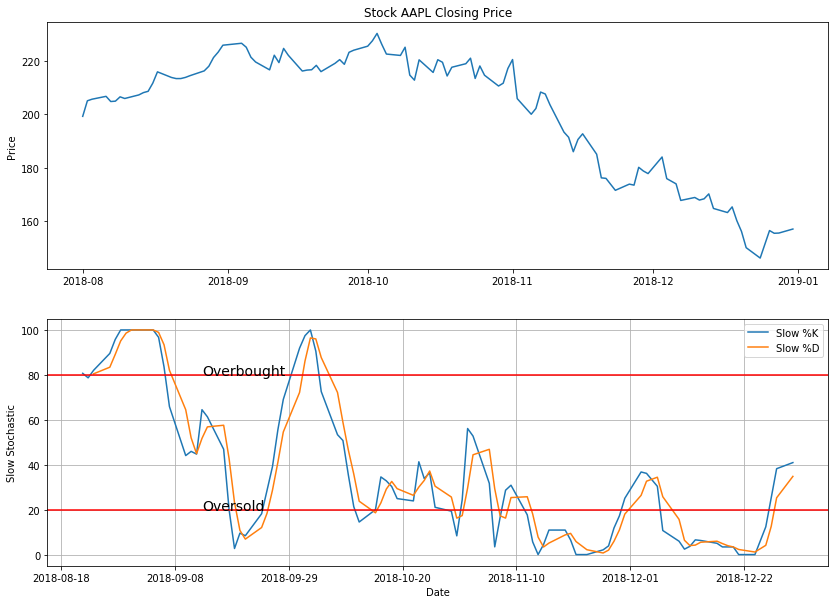

In [5]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Slow_%K'], label='Slow %K')
ax2.plot(df['Slow_%D'], label='Slow %D')
ax2.text(s='Overbought', x=df.index[30], y=80, fontsize=14)
ax2.text(s='Oversold', x=df.index[30], y=20, fontsize=14)
ax2.axhline(y=80, color='red')
ax2.axhline(y=20, color='red')
ax2.grid()
ax2.set_ylabel('Slow Stochastic')
ax2.legend(loc='best')
ax2.set_xlabel('Date')

## Candlestick with Slow Stochastic

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High_Highest,Low_Lowest,Fast_%K,Slow_%K,Slow_%D,VolumePositive
0,736907.0,199.130005,201.759995,197.309998,201.500000,199.243088,67935700,NaN,NaN,NaN,NaN,NaN,True
1,736908.0,200.580002,208.380005,200.350006,207.389999,205.067123,62404000,NaN,NaN,NaN,NaN,NaN,True
2,736909.0,207.029999,208.740005,205.479996,207.990005,205.660416,33447400,NaN,NaN,NaN,NaN,NaN,False
3,736912.0,208.000000,209.250000,207.070007,209.070007,206.728317,25425400,NaN,NaN,NaN,NaN,NaN,False
4,736913.0,209.320007,209.500000,206.759995,207.110001,204.790268,25587400,NaN,NaN,NaN,NaN,NaN,False


Text(0.5,0,'Date')

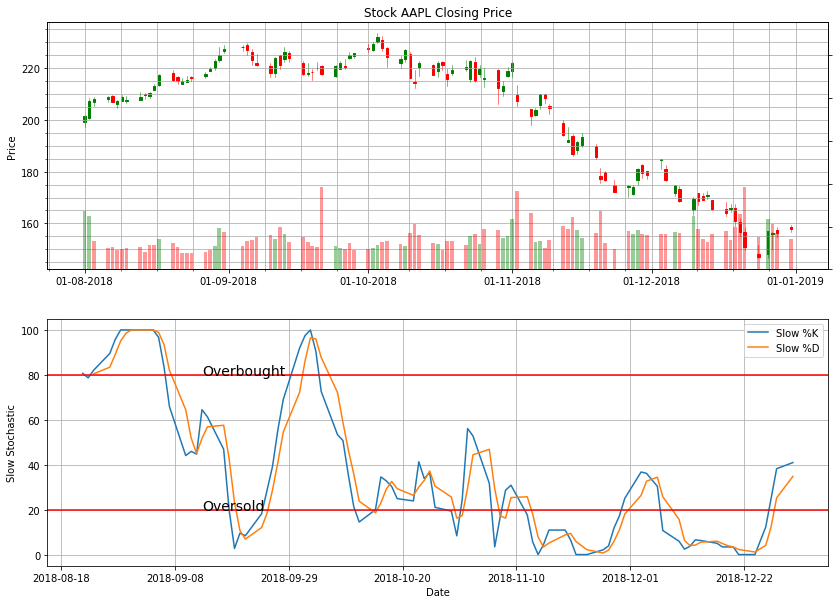

In [7]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Slow_%K'], label='Slow %K')
ax2.plot(df['Slow_%D'], label='Slow %D')
ax2.text(s='Overbought', x=df.index[30], y=80, fontsize=14)
ax2.text(s='Oversold', x=df.index[30], y=20, fontsize=14)
ax2.axhline(y=80, color='red')
ax2.axhline(y=20, color='red')
ax2.grid()
ax2.set_ylabel('Slow Stochastic')
ax2.legend(loc='best')
ax2.set_xlabel('Date')